In [345]:
# Import libraries
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

In [346]:
# Read the datasets 

# Load datasets from Kaggle 
real_news = pd.read_csv('data/True.csv')   # Source: https://www.kaggle.com/datasets/emineyetm/fake-news-detection-datasets
fake_news = pd.read_csv('data/Fake.csv')   # Source: https://www.kaggle.com/datasets/emineyetm/fake-news-detection-datasets


# Load datasets that contain both real and fake news in combined format
news_dataset_2 = pd.read_csv('data/Kaggle2.csv')            # Source: https://www.kaggle.com/c/fake-news/data?select=test.csv
news_dataset_3 = pd.read_csv('data/fake_or_real_news.csv')  # Source: https://www.kaggle.com/datasets/nopdev/real-and-fake-news-dataset

In [347]:
# Display the first few rows of kaggle real news dataset
print("Real News:")
real_news.head()

Real News:


,title,text,subject,date
0,"As U.S. budget fight looms, Republicans flip t...",WASHINGTON (Reuters) - The head of a conservat...,politicsNews,"December 31, 2017"
1,U.S. military to accept transgender recruits o...,WASHINGTON (Reuters) - Transgender people will...,politicsNews,"December 29, 2017"
2,Senior U.S. Republican senator: 'Let Mr. Muell...,WASHINGTON (Reuters) - The special counsel inv...,politicsNews,"December 31, 2017"
3,FBI Russia probe helped by Australian diplomat...,WASHINGTON (Reuters) - Trump campaign adviser ...,politicsNews,"December 30, 2017"
4,Trump wants Postal Service to charge 'much mor...,SEATTLE/WASHINGTON (Reuters) - President Donal...,politicsNews,"December 29, 2017"


In [348]:
# Display the first few rows of kaggle fake news dataset
print("Fake News:")
fake_news.head()

Fake News:


,title,text,subject,date
0,Donald Trump Sends Out Embarrassing New Year’...,Donald Trump just couldn t wish all Americans ...,News,"December 31, 2017"
1,Drunk Bragging Trump Staffer Started Russian ...,House Intelligence Committee Chairman Devin Nu...,News,"December 31, 2017"
2,Sheriff David Clarke Becomes An Internet Joke...,"On Friday, it was revealed that former Milwauk...",News,"December 30, 2017"
3,Trump Is So Obsessed He Even Has Obama’s Name...,"On Christmas day, Donald Trump announced that ...",News,"December 29, 2017"
4,Pope Francis Just Called Out Donald Trump Dur...,Pope Francis used his annual Christmas Day mes...,News,"December 25, 2017"


In [349]:
# Display the first few rows of second kaggle news dataset 
print("Second Kaggle News Dataset:")
news_dataset_2.head()

Second Kaggle News Dataset:


,id,title,author,text,label
0,0,House Dem Aide: We Didn’t Even See Comey’s Let...,Darrell Lucus,House Dem Aide: We Didn’t Even See Comey’s Let...,1
1,1,"FLYNN: Hillary Clinton, Big Woman on Campus - ...",Daniel J. Flynn,Ever get the feeling your life circles the rou...,0
2,2,Why the Truth Might Get You Fired,Consortiumnews.com,"Why the Truth Might Get You Fired October 29, ...",1
3,3,15 Civilians Killed In Single US Airstrike Hav...,Jessica Purkiss,Videos 15 Civilians Killed In Single US Airstr...,1
4,4,Iranian woman jailed for fictional unpublished...,Howard Portnoy,Print \nAn Iranian woman has been sentenced to...,1


In [350]:
# Display the first few rows of third kaggle news dataset
print("Third Kaggle News Dataset:")
news_dataset_3.head()

Third Kaggle News Dataset:


,Unnamed: 0,title,text,label
0,8476,You Can Smell Hillary’s Fear,"Daniel Greenfield, a Shillman Journalism Fello...",FAKE
1,10294,Watch The Exact Moment Paul Ryan Committed Pol...,Google Pinterest Digg Linkedin Reddit Stumbleu...,FAKE
2,3608,Kerry to go to Paris in gesture of sympathy,U.S. Secretary of State John F. Kerry said Mon...,REAL
3,10142,Bernie supporters on Twitter erupt in anger ag...,"— Kaydee King (@KaydeeKing) November 9, 2016 T...",FAKE
4,875,The Battle of New York: Why This Primary Matters,It's primary day in New York and front-runners...,REAL


In [351]:
# Add a 'label' column to indicate real (0) or fake (1) news
real_news['label'] = 0
fake_news['label'] = 1

# Format third dataset to match other two
news_dataset_3['label'] = news_dataset_3['label'].replace({'REAL': 0, 'FAKE': 1})

# Combine the datasets
combined_df = pd.concat([real_news, fake_news, news_dataset_2, news_dataset_3], ignore_index=True)

# Shuffle the combined dataset
combined_df = combined_df.sample(frac=1, random_state=42).reset_index(drop=True)

# Display the first few rows of combined dataset
combined_df.head()

,title,text,subject,date,label,id,author,Unnamed: 0
0,Kurdish leader Barzani resigns after independe...,ERBIL/BAGHDAD Iraq (Reuters) - Iraqi Kurdish l...,worldnews,"October 29, 2017",0,NaN,NaN,NaN
1,White House Press Secretary Responds To Questi...,Report: Friend Has Been Going By Middle Name T...,NaN,NaN,1,13953.0,NaN,NaN
2,Thousands Of Doctors Agree: Single-Payer Is T...,Despite recent assertions from certain Democra...,News,"May 7, 2016",1,NaN,NaN,NaN
3,Senate Intelligence committee leaders confirm ...,WASHINGTON (Reuters) - The Republican and Demo...,politicsNews,"March 27, 2017",0,NaN,NaN,NaN
4,McConnell rules out action this year on high c...,WASHINGTON (Reuters) - Republican U.S. Senate ...,politicsNews,"March 20, 2016",0,NaN,NaN,NaN


In [352]:
# Display dataset information
print("Combined Dataset Information:")
combined_df.info()

Combined Dataset Information:
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 72033 entries, 0 to 72032
Data columns (total 8 columns):
 #   Column      Non-Null Count  Dtype  
---  ------      --------------  -----  
 0   title       71475 non-null  object 
 1   text        71994 non-null  object 
 2   subject     44898 non-null  object 
 3   date        44898 non-null  object 
 4   label       72033 non-null  int64  
 5   id          20800 non-null  float64
 6   author      18843 non-null  object 
 7   Unnamed: 0  6335 non-null   float64
dtypes: float64(2), int64(1), object(5)
memory usage: 4.4+ MB


In [353]:
# Check for missing values
print("Missing Values:")
combined_df.isnull().sum()

Missing Values:


title           558
text             39
subject       27135
date          27135
label             0
id            51233
author        53190
Unnamed: 0    65698
dtype: int64

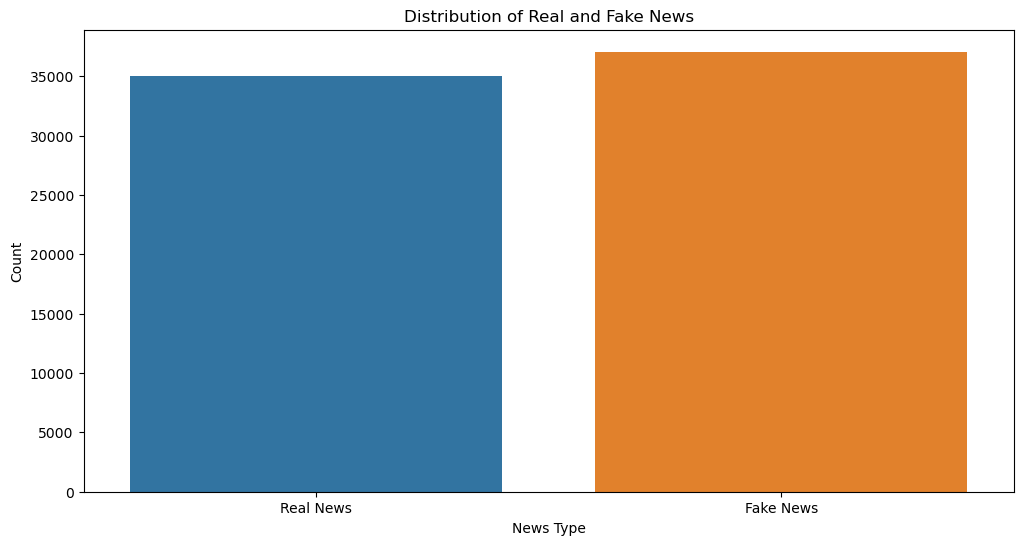

In [354]:
# Visualize the distribution of real and fake news
plt.figure(figsize=(12, 6))
ax = sns.countplot(x='label', data=combined_df)
plt.title('Distribution of Real and Fake News')
plt.xlabel('News Type')
plt.ylabel('Count')
# Set the labels for the x-axis ticks
ax.set_xticklabels(['Real News', 'Fake News'])  
plt.show()

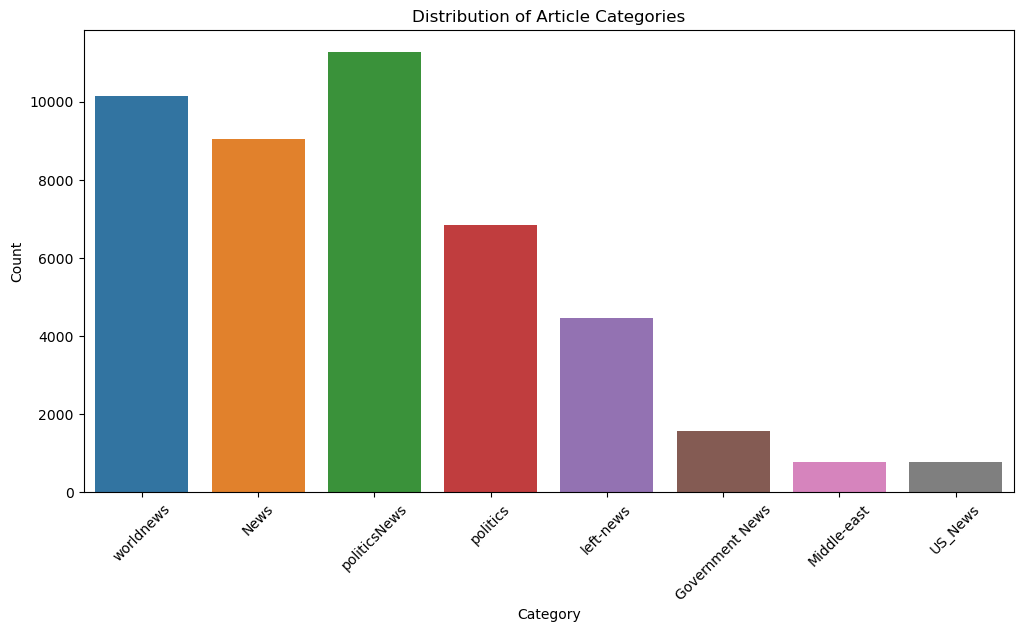

In [355]:
# Visualize the distribution of some of the article categories
plt.figure(figsize=(12, 6))
sns.countplot(x='subject', data=combined_df)
plt.title('Distribution of Article Categories')
plt.xlabel('Category')
plt.ylabel('Count')
plt.xticks(rotation=45)
plt.show()

In [356]:
# Focus only on the 'text' and 'label' columns for the model
combined_df = combined_df[['text', 'label']].dropna(subset=['text'])

# Check again for missing values now that features/columns match in each df
print("Missing Values:")
combined_df.isnull().sum()

Missing Values:


text     0
label    0
dtype: int64

In [357]:
# Remove duplicates from the dataset
duplicates = combined_df.duplicated().sum()
combined_df.drop_duplicates(inplace=True)
print(f"Removed {duplicates} duplicate rows from the combined dataset.")

Removed 9376 duplicate rows from the combined dataset.


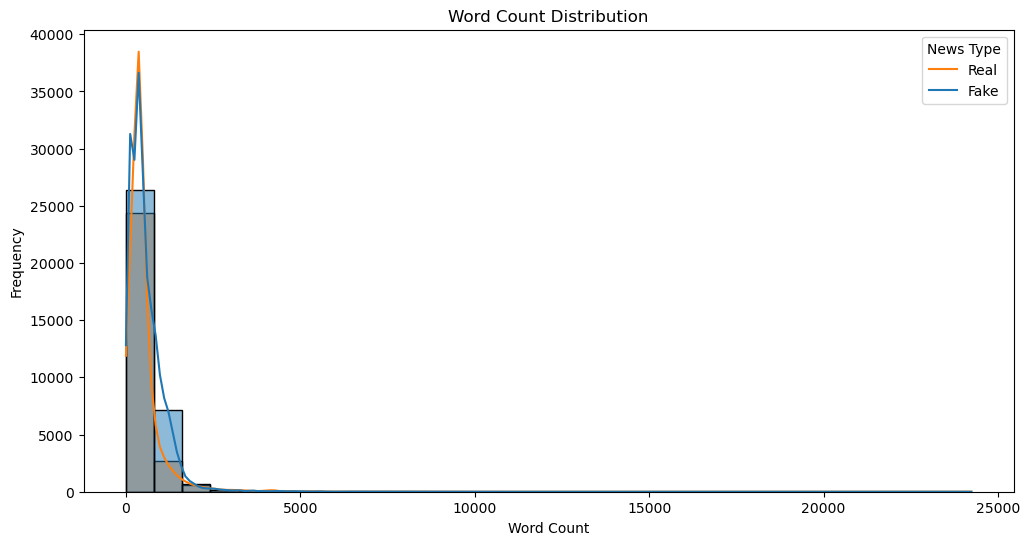

Real News Word Count Statistics:
count    34568.000000
mean       579.664979
std        560.842455
min          0.000000
25%        244.000000
50%        429.000000
75%        785.000000
max      14641.000000
Name: word_count, dtype: float64

Fake News Word Count Statistics:
count    28050.000000
mean       509.810410
std        660.248519
min          0.000000
25%        243.000000
50%        380.000000
75%        565.000000
max      24234.000000
Name: word_count, dtype: float64


In [358]:
# Word Count Analysis
combined_df['word_count'] = combined_df['text'].apply(lambda x: len(x.split()))

plt.figure(figsize=(12, 6))
sns.histplot(data=combined_df, x='word_count', hue='label', kde=True, bins=30)
plt.title('Word Count Distribution')
plt.xlabel('Word Count')
plt.ylabel('Frequency')
plt.legend(title='News Type', labels=['Real', 'Fake']) 
plt.show()

print("Real News Word Count Statistics:")
print(combined_df[combined_df['label'] == 0]['word_count'].describe()) 
print("\nFake News Word Count Statistics:")
print(combined_df[combined_df['label'] == 1]['word_count'].describe()) 

In [333]:
import re

def preprocess_text(text):
    # Convert text to lowercase
    text = text.lower()

    # Remove HTML tags and URLs
    text = re.sub(r'<.*?>|https?://\S+|www\.\S+', '', text)

    # Remove text within square brackets
    text = re.sub(r'\[.*?\]', '', text)

    # Remove text within parentheses
    text = re.sub(r'\(.*?\)', '', text)

    # Remove anything that is not a letter or a space
    text = re.sub(r'[^a-z\s]', '', text)

    # Remove extra whitespace
    text = re.sub(r'\s+', ' ', text).strip()

    # Remove "Reuters" from the dataset
    text = re.sub(r'\bReuters\b', '', text)

    # Tokenize the text
    words = text.split()

    stopwords_set = {
        'i', 'me', 'my', 'myself', 'we', 'our', 
        'ours', 'ourselves', 'you', 'your', 'yours', 
        'yourself', 'yourselves', 'he', 'him', 'his', 
        'himself', 'she', 'her', 'hers', 'herself', 
        'it', 'its', 'itself', 'they', 'them', 'their', 
        'theirs', 'themselves', 'what', 'which', 'who', 
        'whom', 'this', 'that', 'these', 'those', 'am', 
        'is', 'are', 'was', 'were', 'be', 'been', 'being', 
        'have', 'has', 'had', 'having', 'do', 'does', 
        'did', 'doing', 'a', 'an', 'the', 'and', 'but', 
        'if', 'or', 'because', 'as', 'until', 'while', 
        'of', 'at', 'by', 'for', 'with', 'about', 'against', 
        'between', 'into', 'through', 'during', 'before', 
        'after', 'above', 'below', 'to', 'from', 'up', 
        'down', 'in', 'out', 'on', 'off', 'over', 'under', 
        'again', 'further', 'then', 'once', 'here', 'there', 
        'when', 'where', 'why', 'how', 'all', 'any', 'both', 
        'each', 'few', 'more', 'most', 'other', 'some', 'such', 
        'no', 'nor', 'not', 'only', 'own', 'same', 'so', 
        'than', 'too', 'very', 's', 't', 'can', 'will', 'just', 
        'don', 'should', 'now'}

    # Remove stopwords from the text
    filtered_words = [word for word in words if word not in stopwords_set]

    # Join the filtered words back into a single string
    filtered_text = ' '.join(filtered_words)

    return filtered_text

# Apply the preprocessing function to each article text in the DataFrame
combined_df['text'] = combined_df['text'].apply(preprocess_text)

In [334]:
from sklearn.model_selection import train_test_split
from sklearn.feature_extraction.text import TfidfVectorizer

# Perform train-test split
X = combined_df['text']
y = combined_df['label']
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# Create TF-IDF vectorizer
tfidf_vectorizer = TfidfVectorizer()

# Fit and transform the training data
X_train_tfidf = tfidf_vectorizer.fit_transform(X_train)

# Transform the test data
X_test_tfidf = tfidf_vectorizer.transform(X_test)

In [335]:
from sklearn.linear_model import LogisticRegression

# Initialize the Logistic Regression model
lr_model = LogisticRegression()

# Train the model
lr_model.fit(X_train_tfidf, y_train)

LogisticRegression()

In [336]:
# Make predictions on the test data
y_pred_lr = lr_model.predict(X_test_tfidf)

In [337]:
from sklearn.metrics import precision_score, recall_score, f1_score, accuracy_score

# Calculate metrics for Logistic Regression
print("Precision:", precision_score(y_test, y_pred_lr))
print("Recall:", recall_score(y_test, y_pred_lr))
print("F1 Score:", f1_score(y_test, y_pred_lr))
print("Accuracy:", accuracy_score(y_test, y_pred_lr))

Precision: 0.9470909090909091
Recall: 0.9348528356066045
F1 Score: 0.9409320809248556
Accuracy: 0.9477802618971575


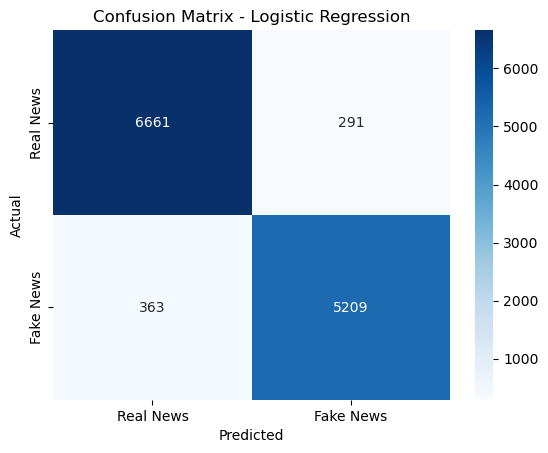

In [338]:
from sklearn.metrics import confusion_matrix

# Compute confusion matrix for Logistic Regression
cm = confusion_matrix(y_test, y_pred_lr)

# Labels for the axes
labels = ['Real News', 'Fake News']

# Plot the confusion matrix
sns.heatmap(cm, annot=True, fmt='d', cmap='Blues', xticklabels=labels, yticklabels=labels)
plt.xlabel('Predicted')
plt.ylabel('Actual')
plt.title('Confusion Matrix - Logistic Regression')
plt.show()

In [339]:
from sklearn.metrics import roc_auc_score

# Compute ROC AUC score
y_scores = lr_model.predict_proba(X_test_tfidf)[:, 1]
roc_auc = roc_auc_score(y_test, y_scores)
print("ROC AUC Score:", roc_auc)

ROC AUC Score: 0.9874894879625812


In [340]:
from sklearn.ensemble import RandomForestClassifier

# Initialize the Random Forest classifier
rf_model = RandomForestClassifier()

# Train the model
rf_model.fit(X_train_tfidf, y_train)

RandomForestClassifier()

In [341]:
# Make predictions on the test data
y_pred_rf = rf_model.predict(X_test_tfidf)

In [342]:
# Calculate metrics for Random Forest
print("Precision:", precision_score(y_test, y_pred_rf))
print("Recall:", recall_score(y_test, y_pred_rf))
print("F1 Score:", f1_score(y_test, y_pred_rf))
print("Accuracy:", accuracy_score(y_test, y_pred_rf))

Precision: 0.9370932754880694
Recall: 0.8528356066044508
F1 Score: 0.8929813022643991
Accuracy: 0.9090546151389333


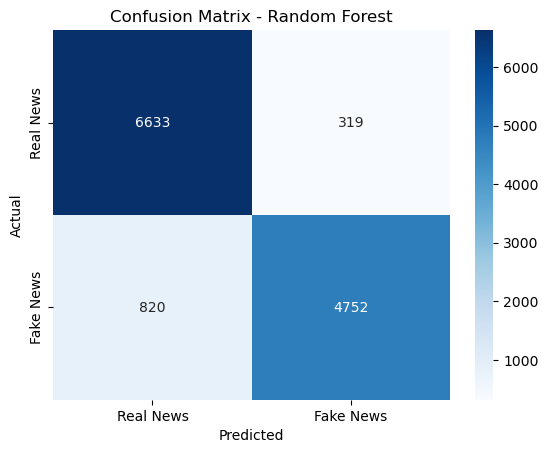

In [343]:
# Compute confusion matrix for Random Forest
cm = confusion_matrix(y_test, y_pred_rf)

# Labels for the axes
labels = ['Real News', 'Fake News']

# Plot the confusion matrix
sns.heatmap(cm, annot=True, fmt='d', cmap='Blues', xticklabels=labels, yticklabels=labels)
plt.xlabel('Predicted')
plt.ylabel('Actual')
plt.title('Confusion Matrix - Random Forest')
plt.show()

In [344]:
# Compute ROC AUC score for Random Forest
y_scores_rf = rf_model.predict_proba(X_test_tfidf)[:, 1]  
roc_auc_rf = roc_auc_score(y_test, y_scores_rf)  
print("ROC AUC Score:", roc_auc_rf)  

ROC AUC Score: 0.9747010471558847


In [360]:
#Gradient Boosting XGBOOST 'pip install xgboost'
import xgboost as xgb

# Initialize the Extreme Gradient Boost Model
gb_model = xgb.XGBClassifier()

# Train the model
gb_model.fit(X_train_tfidf, y_train)

XGBClassifier(base_score=None, booster=None, callbacks=None,
              colsample_bylevel=None, colsample_bynode=None,
              colsample_bytree=None, device=None, early_stopping_rounds=None,
              enable_categorical=False, eval_metric=None, feature_types=None,
              gamma=None, grow_policy=None, importance_type=None,
              interaction_constraints=None, learning_rate=None, max_bin=None,
              max_cat_threshold=None, max_cat_to_onehot=None,
              max_delta_step=None, max_depth=None, max_leaves=None,
              min_child_weight=None, missing=nan, monotone_constraints=None,
              multi_strategy=None, n_estimators=None, n_jobs=None,
              num_parallel_tree=None, random_state=None, ...)

In [361]:
#Make Predictions on data

y_pred_gb = gb_model.predict(X_test_tfidf)

In [362]:
# Calculate metrics for Extreme Gradient Boosting
print("Precision:", precision_score(y_test, y_pred_gb))
print("Recall:", recall_score(y_test, y_pred_gb))
print("F1 Score:", f1_score(y_test, y_pred_gb))
print("Accuracy:", accuracy_score(y_test, y_pred_gb))

Precision: 0.9512992912956569
Recall: 0.9395190236898779
F1 Score: 0.9453724604966139
Accuracy: 0.9516927499201533


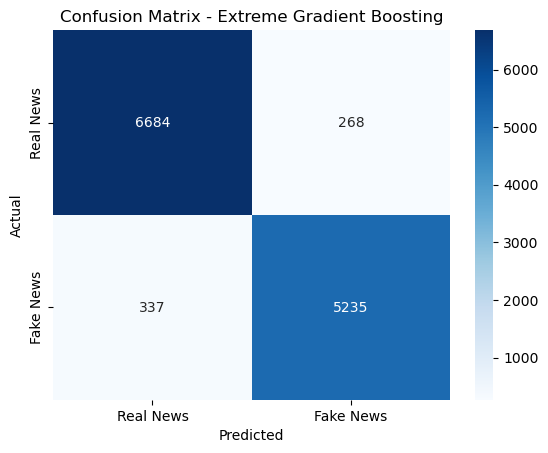

In [363]:
# Compute confusion matrix for Extreme Gradient Boosting
cm = confusion_matrix(y_test, y_pred_gb)

# Labels for the axes
labels = ['Real News', 'Fake News']

# Plot the confusion matrix
sns.heatmap(cm, annot=True, fmt='d', cmap='Blues', xticklabels=labels, yticklabels=labels)
plt.xlabel('Predicted')
plt.ylabel('Actual')
plt.title('Confusion Matrix - Extreme Gradient Boosting')
plt.show()

In [364]:
# Compute ROC AUC score for Extreme Gradient Boost
y_scores_gb = gb_model.predict_proba(X_test_tfidf)[:, 1]  
roc_auc_gb = roc_auc_score(y_test, y_scores_gb)  
print("ROC AUC Score:", roc_auc_gb)  

ROC AUC Score: 0.9898802923668152


In [365]:
import numpy as np
import matplotlib.pyplot as plt

def predict(text):
    # Preprocess text
    preprocessed = preprocess_text(text)
    
    # Vectorize preprocessed text
    vect_text = tfidf_vectorizer.transform([preprocessed])
    
    # Predict with Logistic Regression
    lr_pred = lr_model.predict(vect_text)
    # Predict with Random Forest
    rf_pred = rf_model.predict(vect_text)
    # Predict with XGB
    gb_pred = gb_model.predict(vect_text)
    
    # Calculate probabilities with Logistic Regression
    lr_prob = lr_model.predict_proba(vect_text)[0]
    # Calculate probabilities with Random Forest
    rf_prob = rf_model.predict_proba(vect_text)[0]
    # Calculate probabilities with XGB
    gb_prob = gb_model.predict_proba(vect_text)[0]

    # Weights for each model: Logistic Regression, Random Forest, XGB
    weights = [0.2, 0.2, 0.6]

    # Calculate weighted probabilities
    weighted_prob_real = lr_prob[0] * weights[0] + rf_prob[0] * weights[1] + gb_prob[0] * weights[2]
    weighted_prob_fake = lr_prob[1] * weights[0] + rf_prob[1] * weights[1] + gb_prob[1] * weights[2]

    # Print predictions and probabilities for each model
    print(f"LR Prediction: {'Fake' if lr_pred[0] == 1 else 'Real'}")
    print(f"LR Probabilities: Real: {lr_prob[0]:.2f}, Fake: {lr_prob[1]:.2f}")
    print(f"RF Prediction: {'Fake' if rf_pred[0] == 1 else 'Real'}")
    print(f"RF Probabilities: Real: {rf_prob[0]:.2f}, Fake: {rf_prob[1]:.2f}")
    print(f"XGB Prediction: {'Fake' if gb_pred[0] == 1 else 'Real'}")
    print(f"XGB Probabilities: Real: {gb_prob[0]:.2f}, Fake: {gb_prob[1]:.2f}")

    # Ensemble output
    print(f"Ensemble Probabilities: Real: {weighted_prob_real:.2f}, Fake: {weighted_prob_fake:.2f}")

    # Bar chart
    models = ["Logistic Regression", "Random Forest", "XGBoost", "Ensemble"]
    prob_real = [lr_prob[0], rf_prob[0], gb_prob[0], weighted_prob_real]
    prob_fake = [lr_prob[1], rf_prob[1], gb_prob[1], weighted_prob_fake]
    bar_width = 0.35

    fig, ax = plt.subplots(figsize=(12, 6))
    index = np.arange(len(models))

    bar1 = ax.bar(index, prob_real, bar_width, label='Real', color='blue')
    bar2 = ax.bar(index + bar_width, prob_fake, bar_width, label='Fake', color='red')

    # Labels and Layout
    ax.set_title('Probability of Authenticity by Model')
    ax.set_xlabel('Model')
    ax.set_ylabel('Probability')
    ax.set_xticks(index + bar_width / 2)
    ax.set_xticklabels(models)
    ax.legend()

    plt.show()

LR Prediction: Real
LR Probabilities: Real: 0.84, Fake: 0.16
RF Prediction: Real
RF Probabilities: Real: 0.72, Fake: 0.28
XGB Prediction: Real
XGB Probabilities: Real: 0.88, Fake: 0.12
Ensemble Probabilities: Real: 0.84, Fake: 0.16


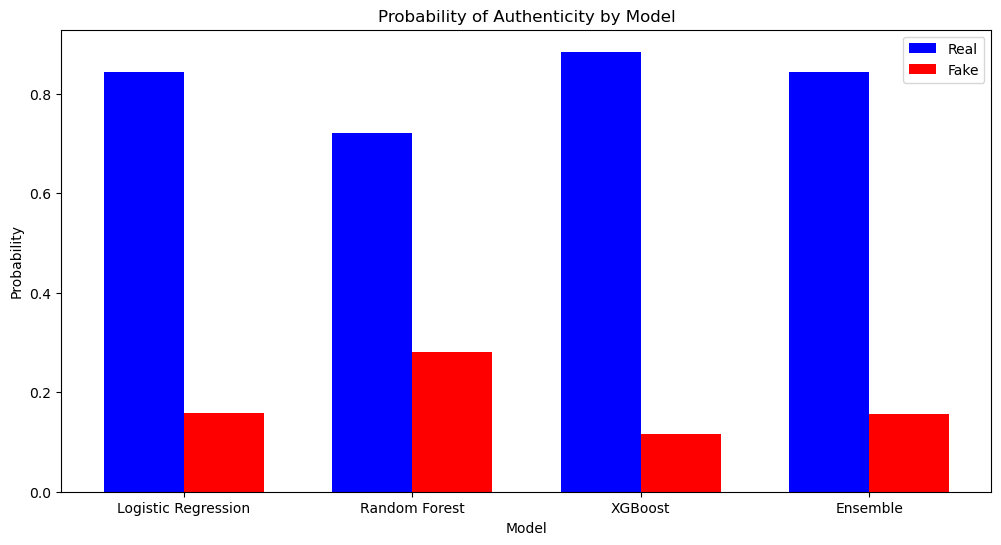

In [366]:
# Real news article example test
# Source: https://www.cnn.com/2024/03/19/politics/supreme-court-allows-texas-to-begin-enforcing-controversial-immigration-law/index.html

text_1 = """

The Supreme Court on Tuesday cleared the way for Texas to immediately begin enforcing a controversial immigration law that allows state officials to arrest and detain people they suspect of entering the country illegally.

The court's three liberals dissented.

Legal challenges to the law are ongoing at a federal appeals court, but the decision hands a significant yet temporary win to Texas, which has been battling the Biden administration over immigration policy.

The court had been blocking the law from taking effect, issuing an indefinite pause on the proceedings a day earlier, which was wiped away by Tuesday's order.

Senate Bill 4, signed into law by Republican Gov. Greg Abbott in December, makes entering Texas illegally a state crime and allows state judges to order immigrants to be deported. Immigration enforcement, generally, is a function of the federal government.

The law immediately raised concerns among immigration advocates of increased racial profiling as well as detentions and attempted deportations by state authorities in Texas, where Latinos represent 40 percent of the population.
"""

predict(text_1)

LR Prediction: Fake
LR Probabilities: Real: 0.25, Fake: 0.75
RF Prediction: Fake
RF Probabilities: Real: 0.45, Fake: 0.55
XGB Prediction: Fake
XGB Probabilities: Real: 0.16, Fake: 0.84
Ensemble Probabilities: Real: 0.23, Fake: 0.77


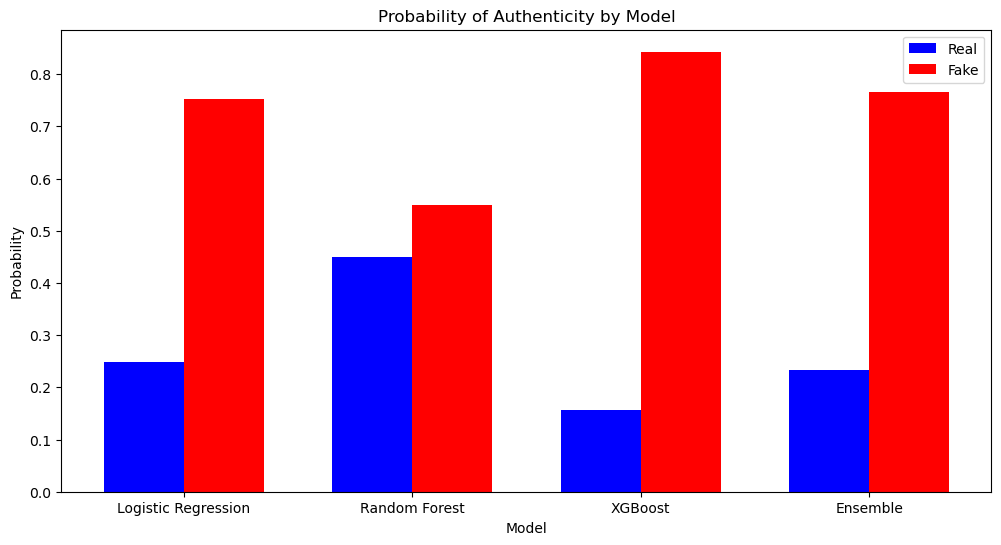

In [367]:
# Fake news article example test

text_2 = """
In a groundbreaking announcement that has shocked the global community, researchers from the International Space Agency (ISA) have confirmed what has long been a subject of folklore and whimsy: the moon is, in fact, made of cheese. This astonishing revelation comes after decades of speculation and myth, turning what was once a fanciful idea into undeniable fact.

The ISA, a consortium of space agencies from over 60 countries, shared their findings at a press conference held at their headquarters in Geneva. According to Dr. Helena Fontaine, the chief of lunar research at the ISA, recent samples collected from the moon's surface during the highly secretive "Apollo 20" mission reveal that the moon is predominantly composed of a substance strikingly similar to aged Gouda.

"Through extensive analysis, we have discovered that the moon's surface is not made of rock, but rather a dense form of cheese that closely resembles Gouda in both taste and texture," Dr. Fontaine explained. "This discovery not only challenges our understanding of the moon but also opens up new avenues for the dairy industry."
"""

predict(text_2)

LR Prediction: Fake
LR Probabilities: Real: 0.21, Fake: 0.79
RF Prediction: Fake
RF Probabilities: Real: 0.29, Fake: 0.71
XGB Prediction: Fake
XGB Probabilities: Real: 0.14, Fake: 0.86
Ensemble Probabilities: Real: 0.19, Fake: 0.81


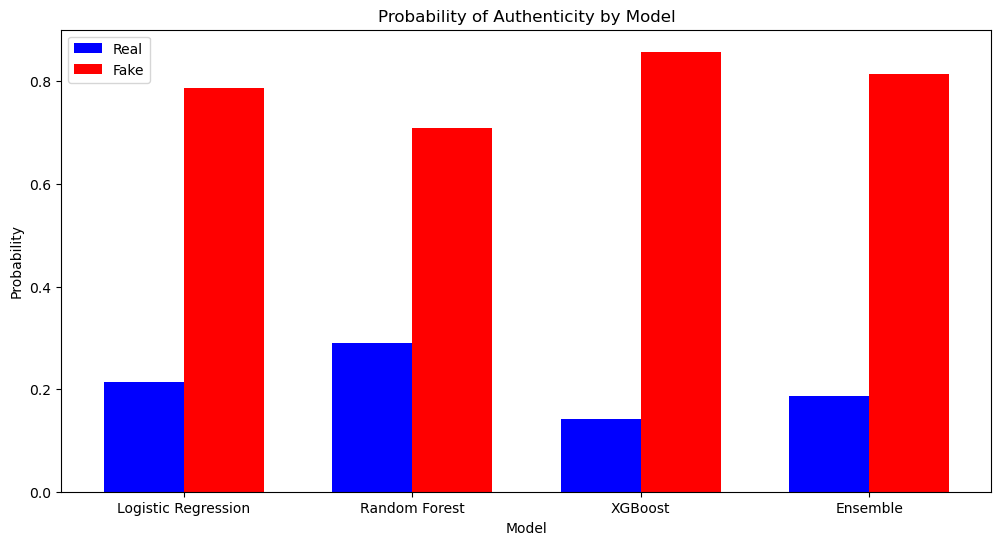

In [368]:
# Fake news GPT 3 Generation
text_3 = """
In a recent study published in the esteemed Journal of Virology, researchers from the renowned Institute of Extraterrestrial Studies (IES) have delved into an intriguing possibility: could there be a connection between the common cold and extraterrestrial life?

Led by Dr. Emily Chang, a respected virologist at the forefront of interstellar research, the team embarked on an ambitious project to analyze the genetic makeup of various strains of the common cold virus. Their goal was to uncover any potential links to microbial organisms found in meteorite samples collected from outer space.

After months of meticulous analysis, the researchers made a compelling discovery. Certain genetic sequences within the common cold virus bore striking similarities to microbial DNA extracted from meteorite samples. While the findings are preliminary, they suggest a tantalizing possibility: some strains of the common cold may have origins beyond Earth.
"""
predict(text_3)

LR Prediction: Fake
LR Probabilities: Real: 0.28, Fake: 0.72
RF Prediction: Fake
RF Probabilities: Real: 0.43, Fake: 0.57
XGB Prediction: Fake
XGB Probabilities: Real: 0.20, Fake: 0.80
Ensemble Probabilities: Real: 0.26, Fake: 0.74


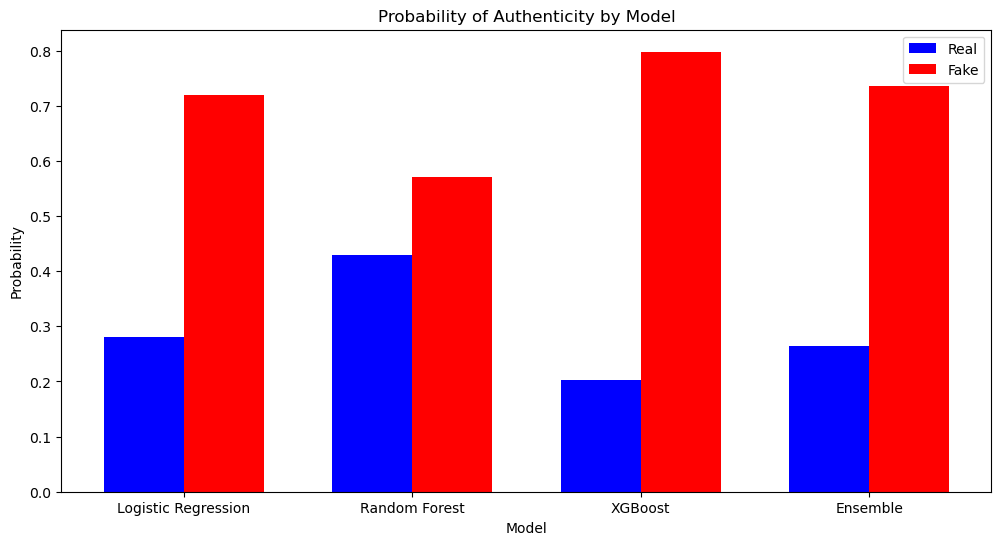

In [369]:
# Fake medical news from GPT 3
text_4 = """
In a surprising turn of events, medical professionals across urban areas are reporting a sharp rise in headache cases, prompting concern among public health officials. The sudden surge in headaches has left experts scrambling for answers and has sparked a wave of speculation about potential causes.
According to Dr. Emily Watson, a neurologist at City General Hospital, "We've seen a significant uptick in patients presenting with severe headaches over the past few weeks. Many of these cases are more intense and persistent than what we typically encounter."
While the exact cause of this headache epidemic remains unclear, some experts are pointing fingers at environmental factors such as air pollution and electromagnetic radiation from electronic devices. Dr. Watson warns, "We know that exposure to certain pollutants and electromagnetic fields can have adverse effects on health, including headaches. It's possible that these factors are contributing to the current situation."
However, not all medical professionals agree on the potential causes. Dr. Michael Johnson, a leading researcher in headache disorders, suggests that stress and lifestyle factors may play a significant role. "In today's fast-paced world, many people are under immense stress, which can trigger headaches. Additionally, factors such as poor sleep, dehydration, and excessive screen time can all contribute to headaches," Dr. Johnson explains.
"""
predict(text_4)

In [370]:
import joblib

import os
if not os.path.exists('pretrained_models'):
    os.makedirs('pretrained_models')
    
# Save the trained models for easy access in UI 
joblib.dump(lr_model, 'pretrained_models/lr_model.pkl')
joblib.dump(rf_model, 'pretrained_models/rf_model.pkl')
joblib.dump(gb_model, 'pretrained_models/gb_model.pkl')

# Save the vectorizer
joblib.dump(tfidf_vectorizer, 'pretrained_models/tfidf_vectorizer.pkl')

['pretrained_models/tfidf_vectorizer.pkl']